In [86]:
import numpy as np
import scipy.stats
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [19]:
class Transaction(object):
    
    N = 10
    n = 2900
    
    # Initialize
    def __init__(self, time,tran_id, sender_id, receiver_id, amount, fee):
        self.starttime = time
        self.tran_id = tran_id
        self.sender_id = sender_id
        self.receiver_id = receiver_id
        self.amount = amount
        self.fee = fee
        self.total = fee+amount
        

    def __init__(self,time):
        self.starttime = time
        self.tran_id = 1
        self.sender_id = np.random.randint(0,self.n+1)
        self.receiver_id = np.random.randint(0,self.n+1)
        self.amount = np.random.randint(5,26)
        self.fee = (np.random.randint(1,3)/100)*self.amount
        self.total = self.amount+self.fee
        
    def __lt__(self,other):
        return self.starttime <= other.starttime
    
    # Print a Transaction
    def __repr__(self):
        send = " Transaction of " + str(self.amount) + " BRCs from " + str(self.sender_id) + " to " + str(self.receiver_id) +" with fee " + str(self.fee) 
        return send

In [20]:
import queue
        
class BlockQueue(object):
       
    K = 12
    N = 10
    n = 2900
    MiningRate = 10
    
    # Initialize a Queue
    def __init__(self, MiningRate, K):
        self.MiningRate = MiningRate
        self.waitingentities = queue.PriorityQueue() #priority
        self.NumberinBlock = []
        self.totalfee = []
        self.accounts = np.zeros(self.N)
        self.totalamount = []
        self.time = []
        self.Numblocks = 0
        self.finished = []
        self.K = K
        
    # Print a Queue (just its name and the entire list of waiting Entities)
    def __repr__(self):
        q = " NumWaiting: " + str(self.waitingentities.qsize()) 
        return q
    
    # A new Entity arrives at this Queue
    def ArriveatQueue(self, newtrans):
        self.waitingentities.put((-int(newtrans.fee),newtrans))
    
    # Exit queue and move to service
    def pushBlock(self,t):
        self.time.append(t)
        number = np.minimum(self.waitingentities.qsize(),self.K)
        self.NumberinBlock.append(number)
        winner = np.random.randint(0,self.N)
        feesum = 0
        totsum = 0
        for i in np.arange(0,number):
            entity = self.waitingentities.get(0)[1]
            feesum = feesum + entity.fee
            totsum = totsum + entity.amount
            entity.endtime = t
            self.finished.append(entity)
        self.totalfee.append(feesum)
        self.totalamount.append(totsum)
        self.accounts[winner] = self.accounts[winner] + feesum
        self.Numblocks = self.Numblocks + 1

K,mu,lambda:  8 , 10 , 120 , Number of Blocks:  1682
Miner earnings:  [292.23 271.87 338.73 272.43 281.74 365.76 288.82 299.54 292.33 309.73]  Average:  301.318
Average transactions per block:  8.0
Average fees per block:  1.7914268727705112
Average money per block:  119.50416171224732


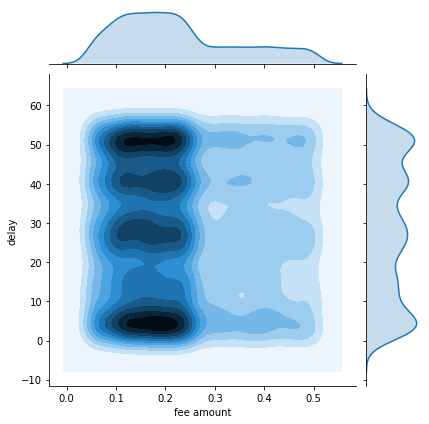

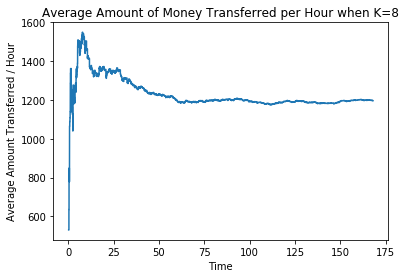

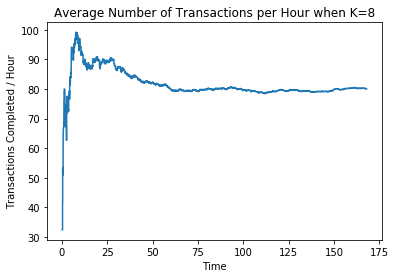

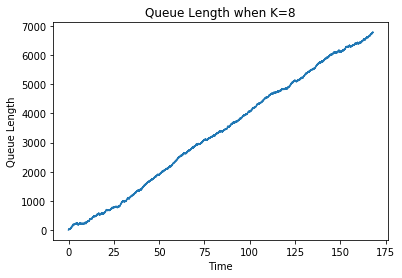

K,mu,lambda:  10 , 10 , 120 , Number of Blocks:  1654
Miner earnings:  [360.5  341.75 379.67 337.2  335.27 371.87 389.56 382.33 415.11 405.55]  Average:  371.881
Average transactions per block:  9.987303506650544
Average fees per block:  2.248373639661427
Average money per block:  149.52841596130594


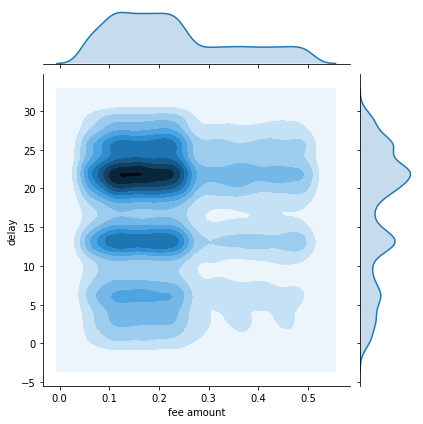

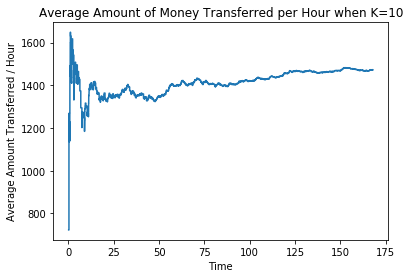

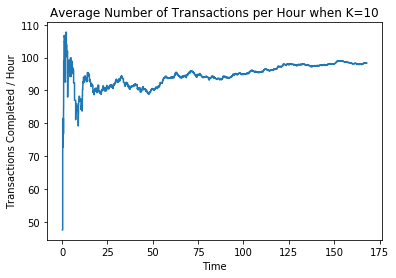

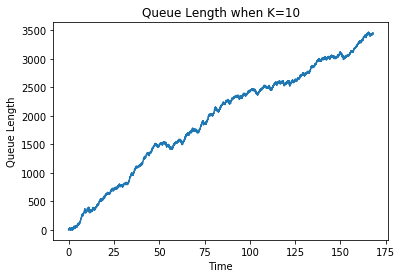

K,mu,lambda:  12 , 10 , 120 , Number of Blocks:  1712
Miner earnings:  [441.51 471.59 469.74 434.95 419.37 466.31 426.96 490.47 438.58 493.57]  Average:  455.30499999999995
Average transactions per block:  11.755257009345794
Average fees per block:  2.6594918224299064
Average money per block:  176.4269859813084


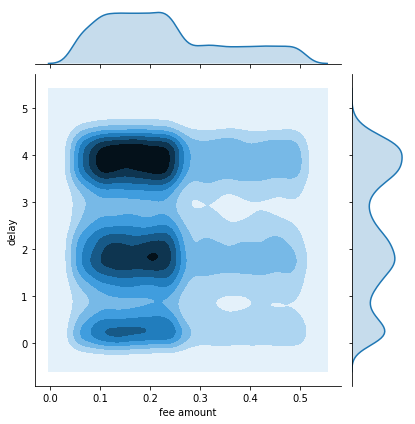

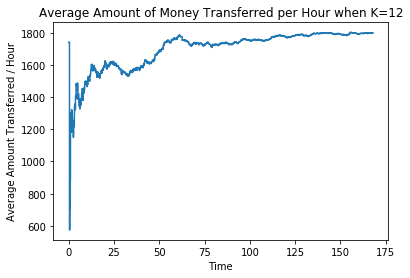

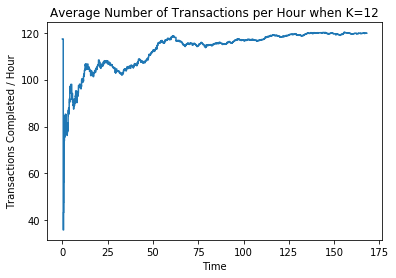

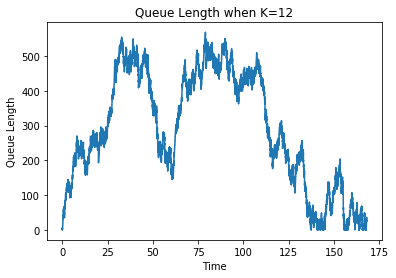

K,mu,lambda:  14 , 10 , 120 , Number of Blocks:  1658
Miner earnings:  [444.07 435.92 444.16 423.26 447.19 422.01 482.12 511.74 444.99 398.68]  Average:  445.41400000000004
Average transactions per block:  11.950542822677924
Average fees per block:  2.6864535585042217
Average money per block:  178.95416164053077


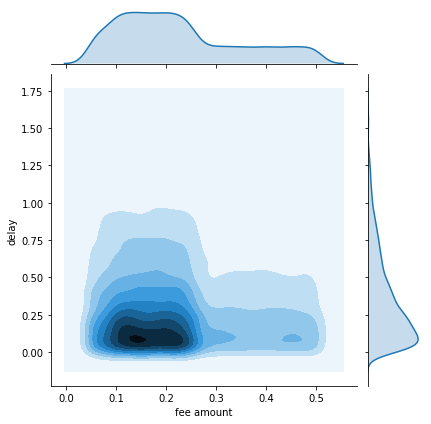

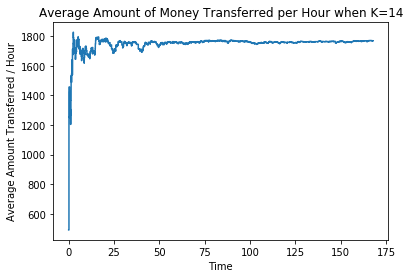

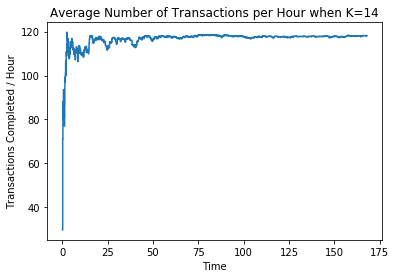

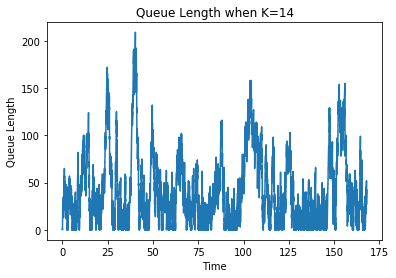

K,mu,lambda:  16 , 10 , 120 , Number of Blocks:  1645
Miner earnings:  [433.   470.39 494.73 449.56 427.56 455.2  445.65 533.68 424.9  404.01]  Average:  453.8680000000001
Average transactions per block:  12.270516717325227
Average fees per block:  2.7590759878419453
Average money per block:  183.6741641337386


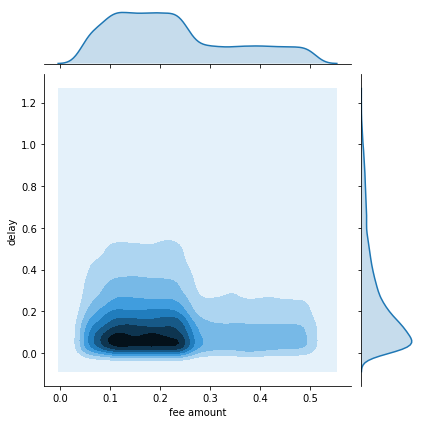

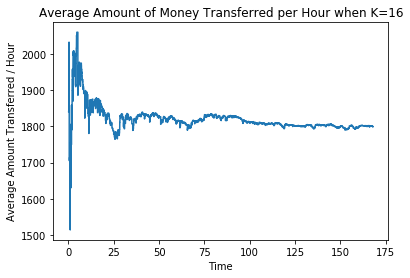

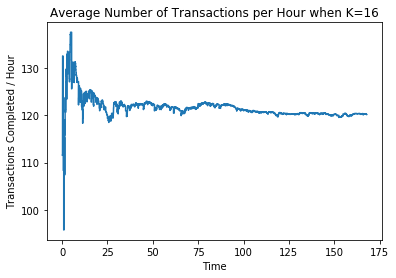

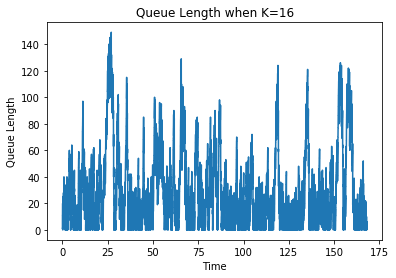

K,mu,lambda:  18 , 10 , 120 , Number of Blocks:  1617
Miner earnings:  [424.97 448.34 482.34 467.13 407.96 429.91 463.99 442.97 490.25 480.82]  Average:  453.86799999999994
Average transactions per block:  12.449598021026592
Average fees per block:  2.806852195423624
Average money per block:  187.12801484230056


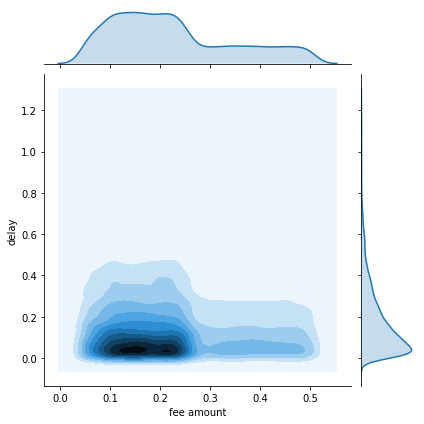

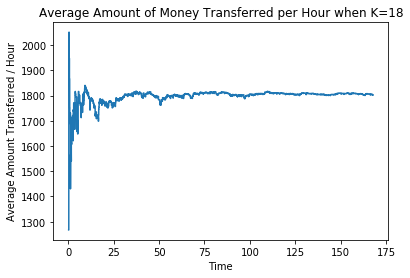

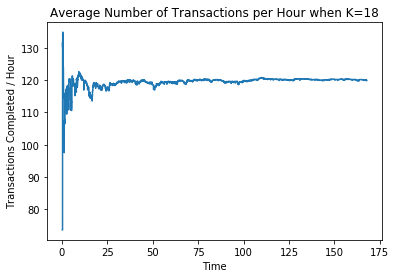

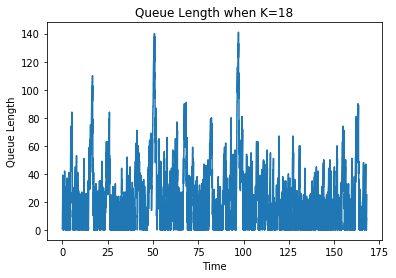

K,mu,lambda:  20 , 10 , 120 , Number of Blocks:  1665
Miner earnings:  [453.12 439.84 538.25 496.57 443.91 420.03 467.07 437.05 450.24 405.97]  Average:  455.2050000000001
Average transactions per block:  12.122522522522523
Average fees per block:  2.7339639639639635
Average money per block:  182.24504504504503


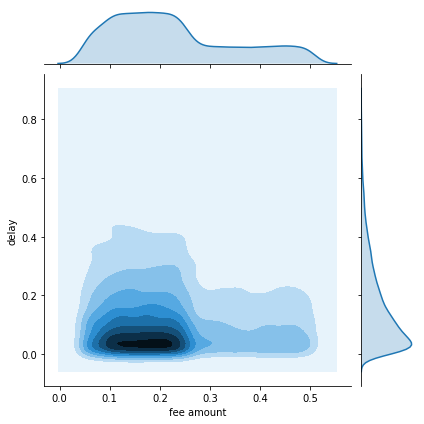

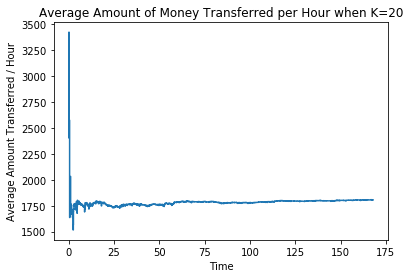

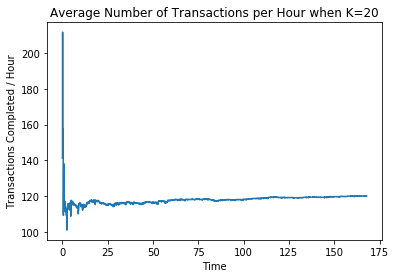

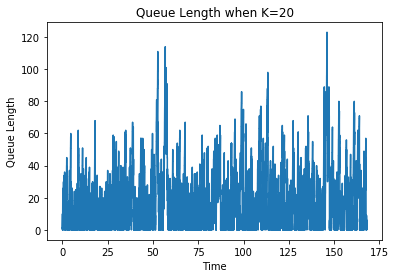

In [129]:
for i in range(8,21,2):
    t = 0
    t_end = 168
    trans_rate = 120
    block_rate = 10
    Block = BlockQueue(10,i)
    qsize = []
    times = []
    duration = []
    amountt = []
    
    total_rate = trans_rate + block_rate
    nextEventTime = t + np.random.exponential(1/total_rate)

    while t < t_end:
        t = nextEventTime
        U = np.random.rand()
        if U <=trans_rate/total_rate:
            event = 0 #transaction arrival
        else:
            event = 1 #block push

        if event == 0:
            newArrival = Transaction(t)
            Block.ArriveatQueue(newArrival)

        if event == 1:
            Block.pushBlock(t)

        qsize.append(Block.waitingentities.qsize())
        times.append(t)
        nextEventTime = t + np.random.exponential(1/total_rate)

    for j in np.arange(0,len(Block.finished)):
        duration.append(Block.finished[j].endtime - Block.finished[j].starttime)
        amountt.append(Block.finished[j].fee)

    print("K,mu,lambda: ", i, ",", block_rate,",", trans_rate,",", "Number of Blocks: ", Block.Numblocks)
    print("Miner earnings: ", Block.accounts, " Average: ", np.mean(Block.accounts))
    print("Average transactions per block: ", np.mean(Block.NumberinBlock))
    print("Average fees per block: ", np.mean(Block.totalfee))
    print("Average money per block: ", np.mean(Block.totalamount))

    zipped = zip(duration, amountt)
    saved = pd.DataFrame(list(sorted(zipped, key=lambda x: x[1])), columns=['delay', 'fee amount'])
    sns.jointplot(x="fee amount", y="delay", data=saved, kind="kde")
    
    plt.figure()
    cumu = np.cumsum(Block.totalamount)
    ave = cumu/Block.time
    plt.step(Block.time, ave, where='post')
    plt.ylabel("Average Amount Transferred / Hour")
    plt.xlabel("Time")
    plt.title("Average Amount of Money Transferred per Hour when K={}".format(i))
    plt.show()
    
    plt.figure()
    bnum = np.cumsum(Block.NumberinBlock)
    avenum = bnum/Block.time
    plt.step(Block.time, avenum, where='post')
    plt.ylabel("Transactions Completed / Hour")
    plt.xlabel("Time")
    plt.title("Average Number of Transactions per Hour when K={}".format(i))
    plt.show()
    
    plt.figure()
    plt.step(times, qsize, where='post')
    plt.ylabel("Queue Length")
    plt.xlabel("Time")
    plt.title("Queue Length when K={}".format(i))
    plt.show()

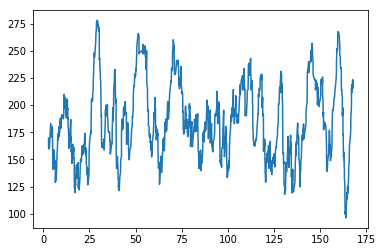

In [110]:
btime = np.array(Block.time)
ave = np.array(btime.shape[0])
ws = 30

ave  = np.cumsum(Block.totalamount)
ave[ws:] = ave[ws:] - ave[:-ws]
ave = ave[ws-1:] / ws

plt.figure()
plt.plot(Block.time[ws-1:], ave)
plt.show()

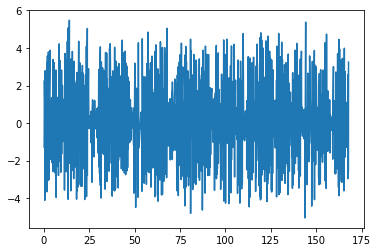

In [111]:
plt.plot(Block.time[1:], np.array(Block.totalfee[1:]) - np.array(Block.totalfee[:-1]))
plt.show()